In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the datasets

data = pd.read_csv('/content/heart (1) (1).csv')
data

,age,sex,type of chest pain,resting blood pressure,chol,diabetes,restecg,maximum heart rate,exng,oldpeak,slp,caa,thall,Heart Attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#preprocessing
#1- Check for the non-numeric column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     303 non-null    int64  
 1   sex                     303 non-null    int64  
 2   type of chest pain      303 non-null    int64  
 3   resting blood pressure  303 non-null    int64  
 4   chol                    303 non-null    int64  
 5   diabetes                303 non-null    int64  
 6   restecg                 303 non-null    int64  
 7   maximum heart rate      303 non-null    int64  
 8   exng                    303 non-null    int64  
 9   oldpeak                 303 non-null    float64
 10  slp                     303 non-null    int64  
 11  caa                     303 non-null    int64  
 12  thall                   303 non-null    int64  
 13  Heart Attack            303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.

In [4]:
#2- Check for null
data.isnull().sum()

,0
age,0
sex,0
type of chest pain,0
resting blood pressure,0
chol,0
diabetes,0
restecg,0
maximum heart rate,0
exng,0
oldpeak,0


<Axes: >

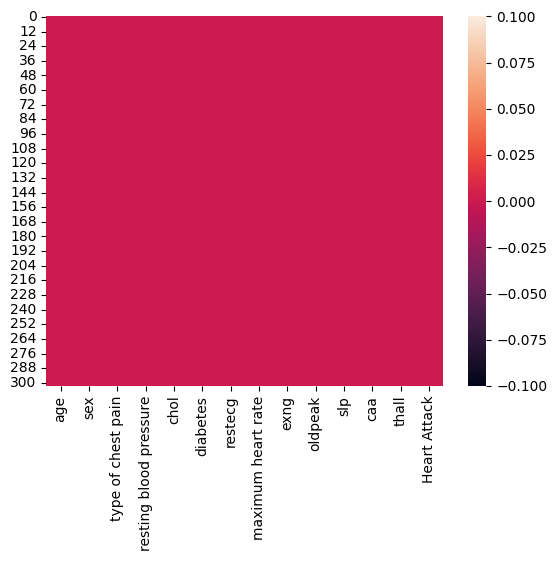

In [5]:
#Visualize null values
import seaborn as sns
sns.heatmap(data.isna())

<ipython-input-6-1850a155081f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


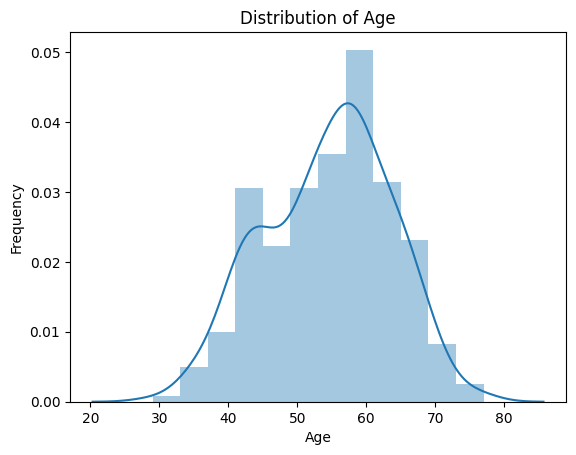

In [6]:
#find the distribution for the age column
sns.distplot(data['age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Heart Attack', ylabel='count'>

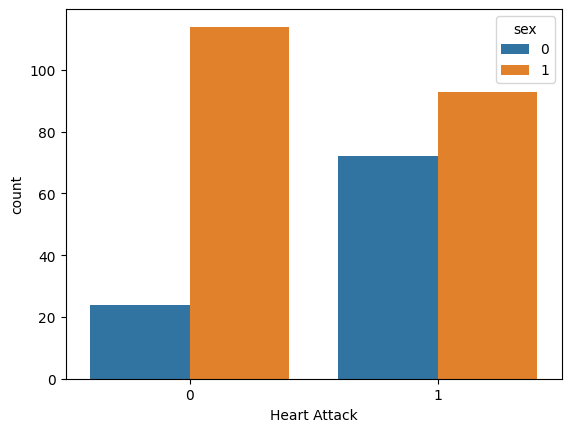

In [7]:
##Distribution of Male=0 vs Female-1 and their chance of heart attack
sns.countplot(x='Heart Attack',data=data,hue='sex')

In [8]:
#split dataset in features and target variable
X = data[['age','maximum heart rate']].values
Y = data['Heart Attack'].values

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


In [10]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)


In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X_Train, Y_Train)

LogisticRegression(random_state=0)

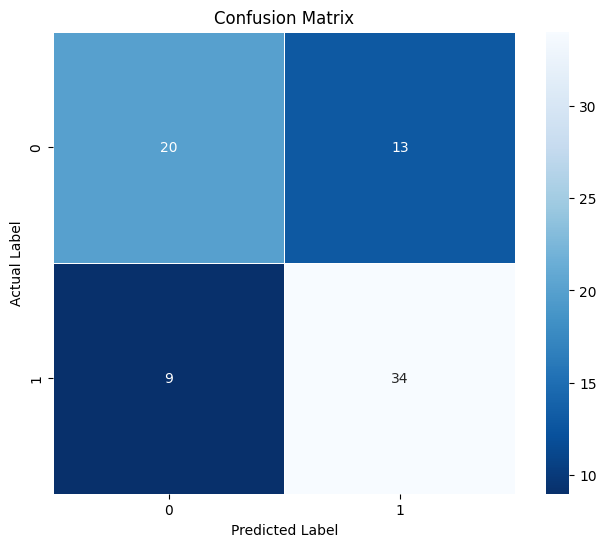

In [12]:
# Predicting the test set results
Y_Pred = model.predict(X_Test)

# create the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
# visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [13]:
# Evaluate the model's performance
from sklearn.metrics import classification_report, accuracy_score
accuracy = accuracy_score(Y_Test, Y_Pred)
report = classification_report(Y_Test, Y_Pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.7105263157894737
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.61      0.65        33
           1       0.72      0.79      0.76        43

    accuracy                           0.71        76
   macro avg       0.71      0.70      0.70        76
weighted avg       0.71      0.71      0.71        76



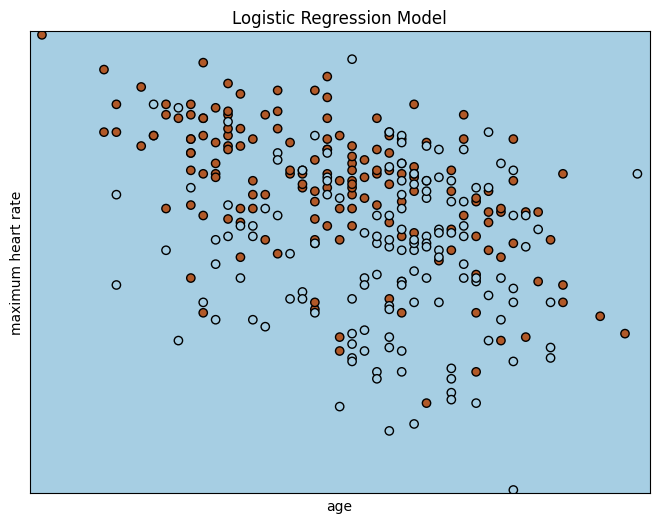

In [14]:
# Create a grid of points to plot in a mesh
h = .02 #step
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Predict the function value for the whole grid
Z =model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('age')
plt.ylabel('maximum heart rate')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Logistic Regression Model')
plt.show()

<ipython-input-15-384648aa04e0>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j,1],


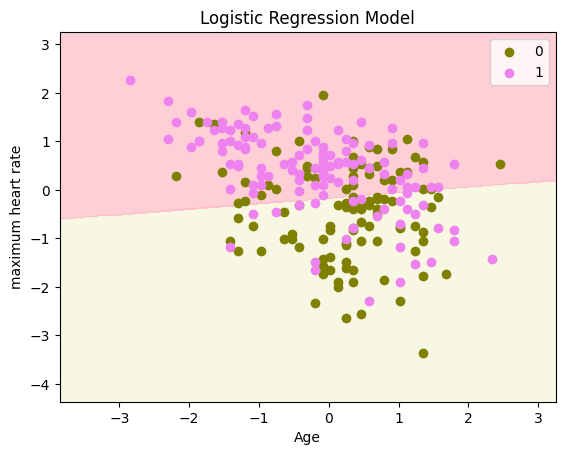

In [15]:
# Visualising the Training set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:,0].min() -1, stop = X_Set[:, 0].max() +1, step = 0.02),
                     np.arange(start = X_Set[:,1].min() -1, stop = X_Set[:, 1].max() +1, step = 0.02))

plt.contourf(X1,X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('beige', 'pink')))

plt.xlim(X1.min(), X2.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j,1],
                c = ListedColormap(('olive', 'violet'))(i), label = j)
plt.title('Logistic Regression Model')
plt.xlabel('Age')
plt.ylabel('maximum heart rate')
plt.legend()
plt.show()

In [16]:
from sklearn import linear_model
def logit2prob(model, X):
  log_odds = model.coef_ * X + model.intercept_
  odds = np.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

print(logit2prob(model, X_Train))

[[0.53050225 0.74685991]
 [0.54747761 0.63933336]
 [0.54182945 0.68317881]
 [0.52766508 0.49615768]
 [0.50491866 0.3447041 ]
 [0.51345602 0.12612632]
 [0.55311357 0.33590653]
 [0.58659481 0.74685991]
 [0.52766508 0.46681439]
 [0.54182945 0.87480211]
 [0.50491866 0.3102056 ]
 [0.50491866 0.54502212]
 [0.55029721 0.69159966]
 [0.50491866 0.05139811]
 [0.47646804 0.65720216]
 [0.51914354 0.44736653]
 [0.49922518 0.36261744]
 [0.52198554 0.42807839]
 [0.58383069 0.80762317]
 [0.51345602 0.17037853]
 [0.50776501 0.26990484]
 [0.53333746 0.47658004]
 [0.56154154 0.78869401]
 [0.52766508 0.10240454]
 [0.51914354 0.17598971]
 [0.51630031 0.73937934]
 [0.49637843 0.19369314]
 [0.57272303 0.7317571 ]
 [0.54747761 0.64831969]
 [0.52766508 0.3102056 ]
 [0.52198554 0.71609575]
 [0.55873592 0.83081259]
 [0.55029721 0.5835431 ]
 [0.47930928 0.24014893]
 [0.49922518 0.50595468]
 [0.52766508 0.65720216]
 [0.52198554 0.64831969]
 [0.55873592 0.54502212]
 [0.53050225 0.48636363]
 [0.52482611 0.63933336]
